In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Loading and preprocessing weather images

In [8]:
# Download the weather images and put them in a directory

path = r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Achievement 2\Data Sets\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [9]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


# Compiling and running

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Define the CNN model architecture
inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5, 5), activation='relu')(inputs)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(64, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3))(x)
x = Conv2D(128, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3))(x)
x = Flatten()(x)
x = Dropout(0.5, seed=5)(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model with categorical crossentropy loss
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model without manually setting steps_per_epoch and validation_steps
history = model.fit(
    train_generator, 
    epochs=16,
    validation_data=test_generator
)

Epoch 1/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 819ms/step - accuracy: 0.4468 - loss: 1.1068 - val_accuracy: 0.4911 - val_loss: 0.9205
Epoch 2/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 864ms/step - accuracy: 0.6020 - loss: 0.8234 - val_accuracy: 0.7143 - val_loss: 0.7031
Epoch 3/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 935ms/step - accuracy: 0.7060 - loss: 0.6460 - val_accuracy: 0.7946 - val_loss: 0.5565
Epoch 4/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 889ms/step - accuracy: 0.8214 - loss: 0.4621 - val_accuracy: 0.8080 - val_loss: 0.4849
Epoch 5/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 782ms/step - accuracy: 0.8566 - loss: 0.4052 - val_accuracy: 0.7857 - val_loss: 0.5205
Epoch 6/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 743ms/step - accuracy: 0.8100 - loss: 0.4877 - val_accuracy: 0.7500 - val_loss: 0.6845
Epoch 7/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 756ms/step - accuracy: 0.8596 - loss: 0.4064 - val_accuracy: 0.7143 - val_loss: 0.8293
Epoch 8/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 766ms/step - accuracy: 0.8661 - loss: 0.3542 - val_accu

# Results

In [24]:
import numpy as np

history_dict = model.history.history
max_length = max(len(history_dict["accuracy"]), len(history_dict["val_accuracy"]))

# Extend val_accuracy and val_loss with NaNs
for key in ["val_accuracy", "val_loss"]:
    if len(history_dict[key]) < max_length:
        history_dict[key].extend([np.nan] * (max_length - len(history_dict[key])))

# Create DataFrame
results = pd.DataFrame(history_dict)

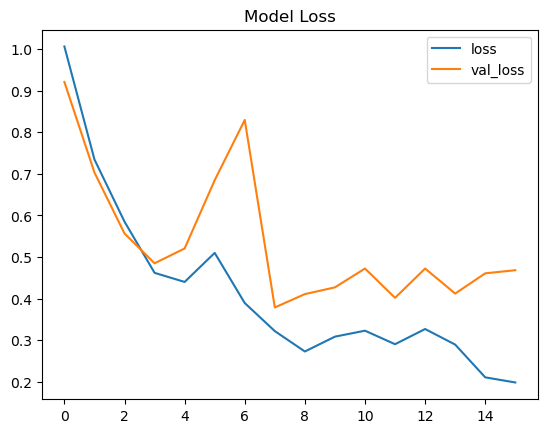

In [25]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

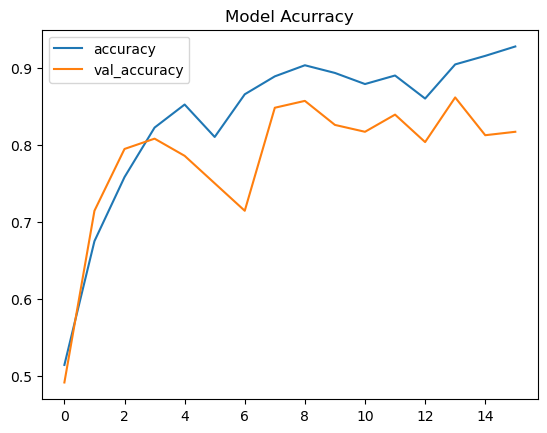

In [26]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [27]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9278579354286194, Val_Accuracy: 0.8169642686843872
Loss: 0.19850607216358185, Val_Loss: 0.46825462579727173


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step


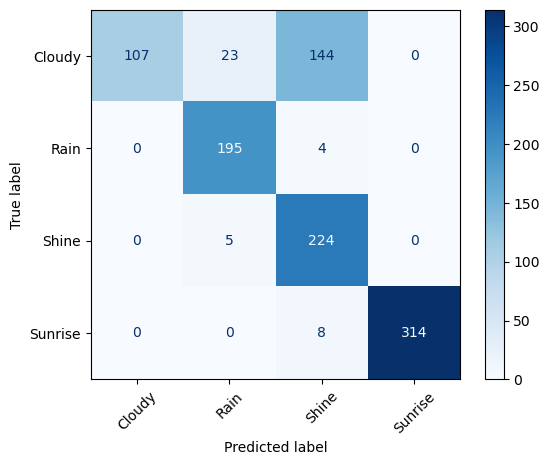

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Class names for labels
class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 32  # Number of batches to select

# Collect batches of images and their true classes
image_batch, classes_batch = next(test_generator)

for batch in range(n - 1):  # Already grabbed the first batch, so we loop n-1 times
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

# Make predictions on the collected images
y_predict = model.predict(image_batch)

# Generate confusion matrix
cm = confusion_matrix(
    y_pred=[np.argmax(x) for x in y_predict],
    y_true=[np.argmax(x) for x in classes_batch]
)

# Display the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')  # Optional: change colormap for better visibility
plt.xticks(rotation=45)   # Rotate x-axis labels if needed
plt.show()

In [30]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


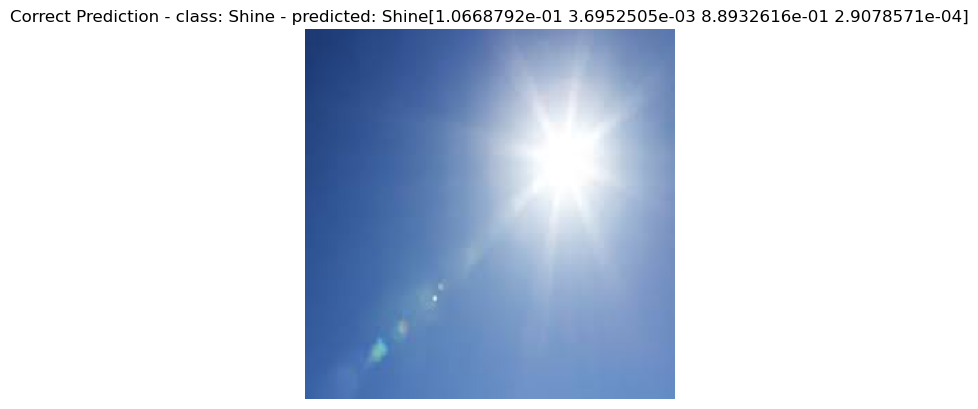

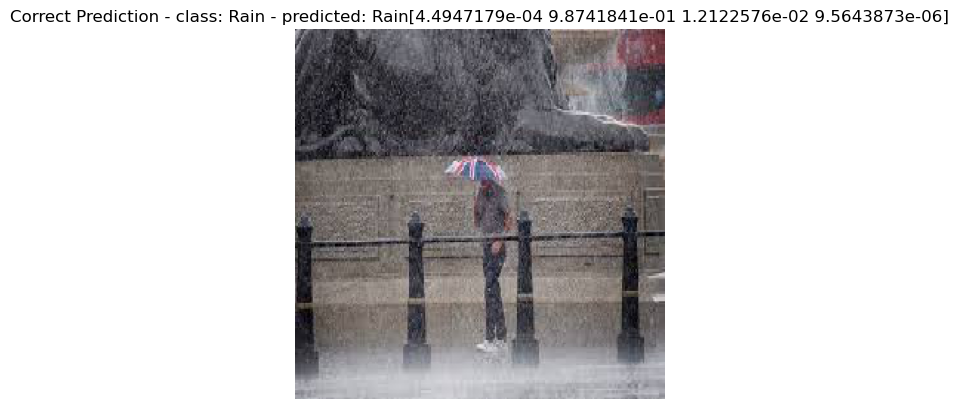

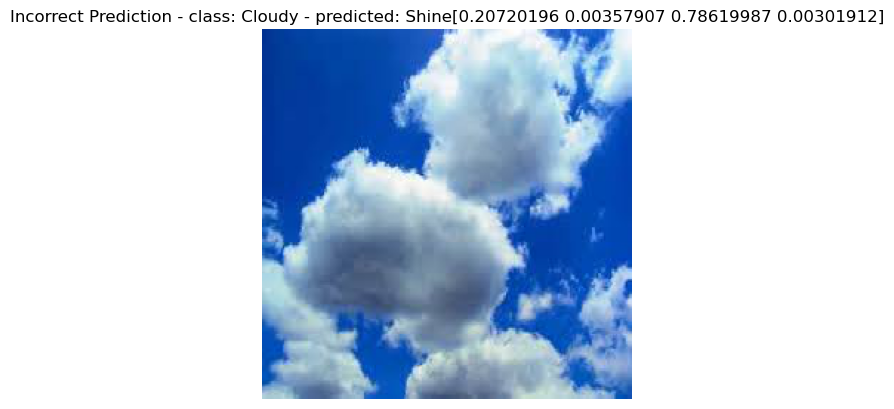

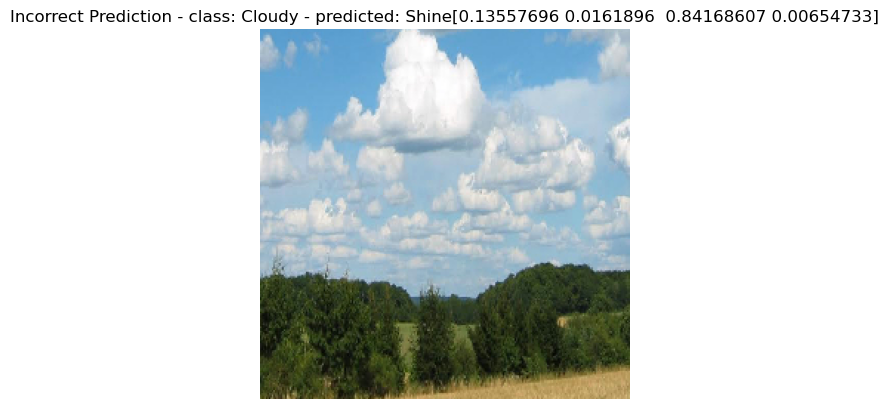

In [31]:
predict_one(model, 4) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

# Bonus Task- Classifiying Pictures from local area

In [32]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Achievement 2\Prepared Handwritten Numbers'

In [33]:
from PIL import Image

img = Image.open(os.path.join(path,'cloudy.jpg'))
print(img.format)
print(img.size)
print(img.mode)

MPO
(4032, 3024)
RGB


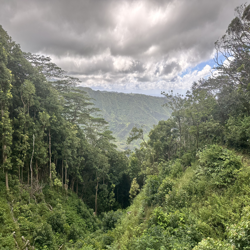

In [34]:
newsize = (250,250)
img2 = img.resize(newsize)
img2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


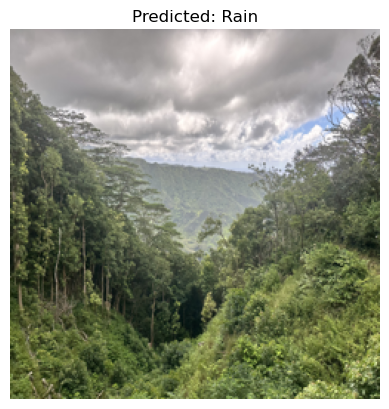

In [35]:
# Define the function to predict and display a single image

def predict_one(model, img2, class_names):
    # Convert the image to RGB (in case it's RGBA)
    img2_rgb = img2.convert('RGB')
    
    # Convert the image to a NumPy array and preprocess for the model
    img_array = np.array(img2_rgb)
    
    # Add batch dimension to the image, as models expect batches
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predicted_batch = model.predict(img_array)
    
    # Since we have only one image, we'll deal with the first element
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]
    
    # Display the image and prediction
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img2_rgb)
    plt.show()

# Call the function
predict_one(model, img2, class_names)

In [36]:
from PIL import Image

img = Image.open(os.path.join(path,'shine.jpg'))
print(img.format)
print(img.size)
print(img.mode)

MPO
(4032, 3024)
RGB


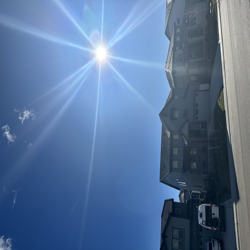

In [37]:
newsize = (250,250)
img3 = img.resize(newsize)
img3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


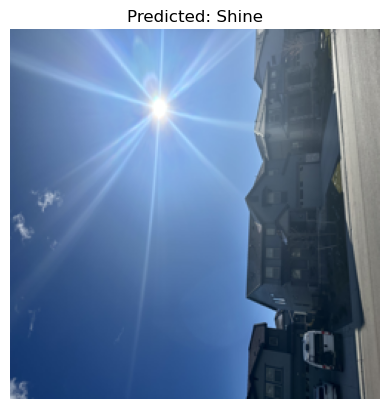

In [38]:
# Define the function to predict and display a single image

def predict_one(model, img3, class_names):
    # Convert the image to RGB (in case it's RGBA)
    img3_rgb = img3.convert('RGB')
    
    # Convert the image to a NumPy array and preprocess for the model
    img_array = np.array(img3_rgb)
    
    # Add batch dimension to the image, as models expect batches
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predicted_batch = model.predict(img_array)
    
    # Since we have only one image, we'll deal with the first element
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]
    
    # Display the image and prediction
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img3_rgb)
    plt.show()

# Call the function
predict_one(model, img3, class_names)

In [ ]:
#the model correctly predicted 1 out of 2 pictures. once again, it struggled to correctly classify cloudy conditions.